In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import pickle

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier




In [52]:
def skew_kurtoisis(column):
    data = pd.DataFrame({
    "Skew": [column.skew()],
    "kurtoisis":[column.kurtosis()]
                })
    print(data)

## Reading Data

In [53]:
data = pd.read_csv(open("Customer_Cancelation.csv","r"))
data

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

## Some Statistics

In [55]:
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Check NANs

In [56]:
data.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

## Check Duplicates

In [57]:
data.duplicated().sum()

0

## Drop Useless cols

In [58]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [59]:
data.drop(columns= ["Booking_ID"], axis= 1, inplace= True)

In [60]:
data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [61]:
#Not bad
data.duplicated().sum()

10276

## Encoding Catergorical cols for easy visualizing

In [62]:
data["type of meal"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [63]:
data["type of meal"].replace("Not Selected",0, inplace= True)
data["type of meal"].replace("Meal Plan 1", 1, inplace= True)
data["type of meal"].replace("Meal Plan 2", 2, inplace= True)
data["type of meal"].replace("Meal Plan 3", 3, inplace= True)

In [64]:
data["room type"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [65]:
data["room type"].replace("Room_Type 1", 1, inplace= True)
data["room type"].replace("Room_Type 2", 2, inplace= True)
data["room type"].replace("Room_Type 3", 3, inplace= True)
data["room type"].replace("Room_Type 4", 4, inplace= True)
data["room type"].replace("Room_Type 5", 5, inplace= True)
data["room type"].replace("Room_Type 6", 6, inplace= True)
data["room type"].replace("Room_Type 7", 7, inplace= True)


In [66]:
data["market segment type"].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [67]:
lab_encoder = LabelEncoder()
data["market segment type"] = lab_encoder.fit_transform(data["market segment type"])

In [68]:
data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,1,0,1,224,3,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,0,0,1,5,4,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,1,0,1,1,4,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,1,0,1,211,4,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,0,0,1,48,4,0,0,0,77.00,0,4/11/2018,Canceled


## Encoding for model

In [69]:
data.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'date of reservation',
       'booking status'],
      dtype='object')

In [70]:
data

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,1,0,1,224,3,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,0,0,1,5,4,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,1,0,1,1,4,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,1,0,1,211,4,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,0,0,1,48,4,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,2,0,1,346,4,0,0,0,115.00,1,9/13/2018,Canceled
36281,2,0,1,3,1,0,1,34,4,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,2,0,1,3,1,0,4,83,4,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,3,0,0,4,1,0,1,121,3,0,0,0,96.90,1,7/6/2018,Not_Canceled


## Splitting Date Feature

###### Dates with /

In [71]:
df_slash = pd.DataFrame(data["date of reservation"].str.split("/", expand = True).values.tolist(),
              columns= ['month', 'day', 'year'])

In [72]:
df_slash.head()

,month,day,year
0,10,2,2015
1,11,6,2018
2,2,28,2018
3,5,20,2017
4,4,11,2018


In [73]:
df_slash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   36285 non-null  object
 1   day     36248 non-null  object
 2   year    36248 non-null  object
dtypes: object(3)
memory usage: 850.6+ KB


###### Dates with -

In [74]:
df_ = pd.DataFrame(df_slash[df_slash["day"].isna()]["month"].str.split("-", expand = True).values.tolist(),
                    columns= ['year', 'month', 'day']
                    )
df_.head()

,year,month,day
0,2018,2,29
1,2018,2,29
2,2018,2,29
3,2018,2,29
4,2018,2,29


In [75]:
# we will delete the 37 instance with "-" to have the same number of rows of data
df_slash.drop(df_slash[df_slash["day"].isna()].index,
             axis= 0, 
             inplace= True,
             )

In [76]:
df_slash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36248 entries, 0 to 36284
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   36248 non-null  object
 1   day     36248 non-null  object
 2   year    36248 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


###### Merge 2 DFs

In [77]:
result_date = pd.concat([df_slash,df_], ignore_index=True) 
result_date.head()

,month,day,year
0,10,2,2015
1,11,6,2018
2,2,28,2018
3,5,20,2017
4,4,11,2018


In [78]:
result_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   36285 non-null  object
 1   day     36285 non-null  object
 2   year    36285 non-null  object
dtypes: object(3)
memory usage: 850.6+ KB


In [79]:
data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,1,0,1,224,3,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,0,0,1,5,4,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,1,0,1,1,4,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,1,0,1,211,4,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,0,0,1,48,4,0,0,0,77.00,0,4/11/2018,Canceled


###### Merge dates to original data

In [80]:
data = data.join(result_date, lsuffix='data', rsuffix='result_date')

In [81]:
data

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,month,day,year
0,1,1,2,5,1,0,1,224,3,0,0,0,88.00,0,10/2/2015,Not_Canceled,10,2,2015
1,1,0,1,3,0,0,1,5,4,0,0,0,106.68,1,11/6/2018,Not_Canceled,11,6,2018
2,2,1,1,3,1,0,1,1,4,0,0,0,50.00,0,2/28/2018,Canceled,2,28,2018
3,1,0,0,2,1,0,1,211,4,0,0,0,100.00,1,5/20/2017,Canceled,5,20,2017
4,1,0,1,2,0,0,1,48,4,0,0,0,77.00,0,4/11/2018,Canceled,4,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,2,0,1,346,4,0,0,0,115.00,1,9/13/2018,Canceled,2,29,2018
36281,2,0,1,3,1,0,1,34,4,0,0,0,107.55,1,10/15/2017,Not_Canceled,2,29,2018
36282,2,0,1,3,1,0,4,83,4,0,0,0,105.61,1,12/26/2018,Not_Canceled,2,29,2018
36283,3,0,0,4,1,0,1,121,3,0,0,0,96.90,1,7/6/2018,Not_Canceled,2,29,2018


###### Drop date feature

In [82]:
data.drop(columns="date of reservation", inplace=True)

## Re-Format

In [83]:
data["month"]= data["month"].astype("int64")
data["day"]= data["day"].astype("int64")
data["year"]= data["year"].astype("int64")

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  int64  
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  int64  
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  int32  
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  bookin

## Cleaned Data

In [85]:
data

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,month,day,year
0,1,1,2,5,1,0,1,224,3,0,0,0,88.00,0,Not_Canceled,10,2,2015
1,1,0,1,3,0,0,1,5,4,0,0,0,106.68,1,Not_Canceled,11,6,2018
2,2,1,1,3,1,0,1,1,4,0,0,0,50.00,0,Canceled,2,28,2018
3,1,0,0,2,1,0,1,211,4,0,0,0,100.00,1,Canceled,5,20,2017
4,1,0,1,2,0,0,1,48,4,0,0,0,77.00,0,Canceled,4,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,2,0,1,346,4,0,0,0,115.00,1,Canceled,2,29,2018
36281,2,0,1,3,1,0,1,34,4,0,0,0,107.55,1,Not_Canceled,2,29,2018
36282,2,0,1,3,1,0,4,83,4,0,0,0,105.61,1,Not_Canceled,2,29,2018
36283,3,0,0,4,1,0,1,121,3,0,0,0,96.90,1,Not_Canceled,2,29,2018


## All Features

In [86]:
features = data.loc[:,~data.columns.isin(["booking status"])]
features

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,month,day,year
0,1,1,2,5,1,0,1,224,3,0,0,0,88.00,0,10,2,2015
1,1,0,1,3,0,0,1,5,4,0,0,0,106.68,1,11,6,2018
2,2,1,1,3,1,0,1,1,4,0,0,0,50.00,0,2,28,2018
3,1,0,0,2,1,0,1,211,4,0,0,0,100.00,1,5,20,2017
4,1,0,1,2,0,0,1,48,4,0,0,0,77.00,0,4,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,2,0,1,346,4,0,0,0,115.00,1,2,29,2018
36281,2,0,1,3,1,0,1,34,4,0,0,0,107.55,1,2,29,2018
36282,2,0,1,3,1,0,4,83,4,0,0,0,105.61,1,2,29,2018
36283,3,0,0,4,1,0,1,121,3,0,0,0,96.90,1,2,29,2018


## Continous features

In [87]:
con_features = data.loc[:, data.columns.isin(['lead time', 'average price '])]
con_features

,lead time,average price
0,224,88.00
1,5,106.68
2,1,50.00
3,211,100.00
4,48,77.00
...,...,...
36280,346,115.00
36281,34,107.55
36282,83,105.61
36283,121,96.90


## Discrete Features

In [88]:
disc_features = data.loc[:, ~data.columns.isin(['lead time', 'average price ', "booking status"])]
disc_features

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,market segment type,repeated,P-C,P-not-C,special requests,month,day,year
0,1,1,2,5,1,0,1,3,0,0,0,0,10,2,2015
1,1,0,1,3,0,0,1,4,0,0,0,1,11,6,2018
2,2,1,1,3,1,0,1,4,0,0,0,0,2,28,2018
3,1,0,0,2,1,0,1,4,0,0,0,1,5,20,2017
4,1,0,1,2,0,0,1,4,0,0,0,0,4,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,2,0,1,4,0,0,0,1,2,29,2018
36281,2,0,1,3,1,0,1,4,0,0,0,1,2,29,2018
36282,2,0,1,3,1,0,4,4,0,0,0,1,2,29,2018
36283,3,0,0,4,1,0,1,3,0,0,0,1,2,29,2018


## Target

In [89]:
target = data.loc[:, ["booking status"]]
target

,booking status
0,Not_Canceled
1,Not_Canceled
2,Canceled
3,Canceled
4,Canceled
...,...
36280,Canceled
36281,Not_Canceled
36282,Not_Canceled
36283,Not_Canceled


## Univariate Analysis

###### lead time

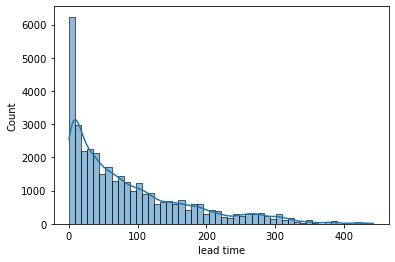

In [90]:
sns.histplot(x= "lead time", bins=50, kde= True,data= features)
plt.show()

In [91]:
skew_kurtoisis(con_features.iloc[:,0])

       Skew  kurtoisis
0  1.292436   1.179155


"Note"
lead time column has right skew shape = 1.3 & small kurtoisis = 1.2

###### average price

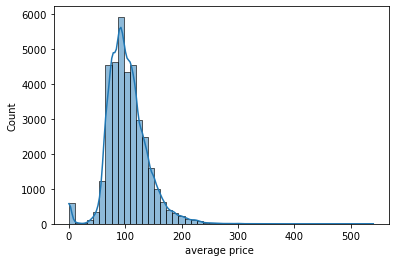

In [94]:
sns.histplot(x= "average price ", bins=50, kde= True,data= features)
plt.show()

In [95]:
skew_kurtoisis(con_features.iloc[:,1])

       Skew  kurtoisis
0  0.667186   3.154819


"Note" average price column has small right skew shape = .7 & high kurtoisis = 3.15

## StandardScaler

In [96]:
features_cols= features.columns

In [97]:
ss = StandardScaler()
ss.fit(features)

StandardScaler()

In [98]:
features= ss.transform(features)
features= pd.DataFrame(features, columns= features_cols)

In [99]:
features

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,month,day,year
0,-1.628431,2.221609,1.366111,1.981250,0.104223,-0.178794,-0.506408,1.614661,-0.810717,-0.162187,-0.063385,-0.087444,-0.439538,-0.788212,0.839179,-1.555650,-7.339943
1,-1.628431,-0.261636,0.217450,0.563741,-1.978232,-0.178794,-0.506408,-0.933699,0.656678,-0.162187,-0.063385,-0.087444,0.092868,0.483646,1.164923,-1.097994,0.467721
2,0.299073,2.221609,0.217450,0.563741,0.104223,-0.178794,-0.506408,-0.980244,0.656678,-0.162187,-0.063385,-0.087444,-1.522592,-0.788212,-1.766776,1.419110,0.467721
3,-1.628431,-0.261636,-0.931212,-0.145013,0.104223,-0.178794,-0.506408,1.463389,0.656678,-0.162187,-0.063385,-0.087444,-0.097521,0.483646,-0.789543,0.503799,-2.134834
4,-1.628431,-0.261636,0.217450,-0.145013,-1.978232,-0.178794,-0.506408,-0.433336,0.656678,-0.162187,-0.063385,-0.087444,-0.753054,-0.788212,-1.115287,-0.525925,0.467721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,0.299073,-0.261636,-0.931212,-0.145013,2.186679,-0.178794,-0.506408,3.034296,0.656678,-0.162187,-0.063385,-0.087444,0.330000,0.483646,-1.766776,1.533524,0.467721
36281,0.299073,-0.261636,0.217450,0.563741,0.104223,-0.178794,-0.506408,-0.596245,0.656678,-0.162187,-0.063385,-0.087444,0.117664,0.483646,-1.766776,1.533524,0.467721
36282,0.299073,-0.261636,0.217450,0.563741,0.104223,-0.178794,1.636784,-0.026064,0.656678,-0.162187,-0.063385,-0.087444,0.062371,0.483646,-1.766776,1.533524,0.467721
36283,2.226577,-0.261636,-0.931212,1.272496,0.104223,-0.178794,-0.506408,0.416118,-0.810717,-0.162187,-0.063385,-0.087444,-0.185876,0.483646,-1.766776,1.533524,0.467721


### Countpot Each Feature

<Figure size 720x360 with 0 Axes>

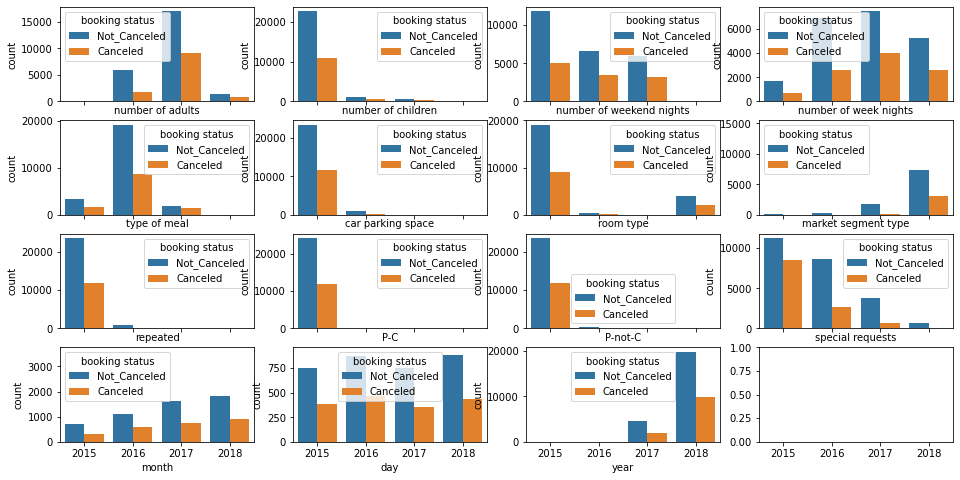

In [100]:
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(4,4, sharex=True, figsize=(16,8))


sns.countplot(ax= ax[0,0], x= disc_features.iloc[:,0], hue= target.squeeze())
sns.countplot(ax= ax[0,1], x= disc_features.iloc[:,1], hue= target.squeeze())
sns.countplot(ax= ax[0,2], x= disc_features.iloc[:,2], hue= target.squeeze())
sns.countplot(ax= ax[0,3], x= disc_features.iloc[:,3], hue= target.squeeze())
sns.countplot(ax= ax[1,0], x= disc_features.iloc[:,4], hue= target.squeeze())
sns.countplot(ax= ax[1,1], x= disc_features.iloc[:,5], hue= target.squeeze())
sns.countplot(ax= ax[1,2], x= disc_features.iloc[:,6], hue= target.squeeze())
sns.countplot(ax= ax[1,3], x= disc_features.iloc[:,7], hue= target.squeeze())
sns.countplot(ax= ax[2,0], x= disc_features.iloc[:,8], hue= target.squeeze())
sns.countplot(ax= ax[2,1], x= disc_features.iloc[:,9], hue= target.squeeze())
sns.countplot(ax= ax[2,2], x= disc_features.iloc[:,10], hue= target.squeeze())
sns.countplot(ax= ax[2,3], x= disc_features.iloc[:,11], hue= target.squeeze())
sns.countplot(ax= ax[3,0], x= disc_features.iloc[:,12], hue= target.squeeze())
sns.countplot(ax= ax[3,1], x= disc_features.iloc[:,13], hue= target.squeeze())
sns.countplot(ax= ax[3,2], x= disc_features.iloc[:,14], hue= target.squeeze())


plt.show()

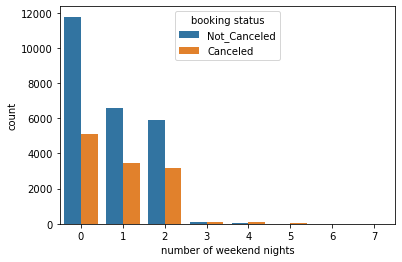

In [101]:
sns.countplot(x= disc_features.iloc[:,2], hue=target.squeeze())
plt.show()

###### Number of week nights

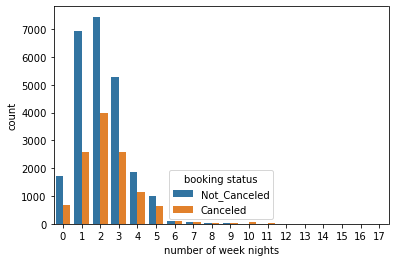

In [102]:
sns.countplot(x=disc_features.iloc[:,3], hue=target.squeeze())
plt.show()

###### Room type

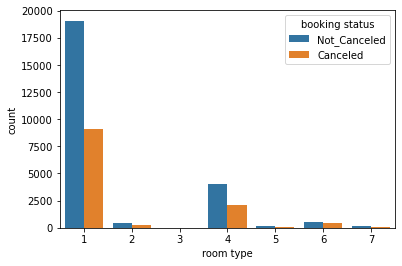

In [103]:
sns.countplot(x= disc_features.iloc[:,6], hue=target.squeeze())
plt.show()

###### P-C

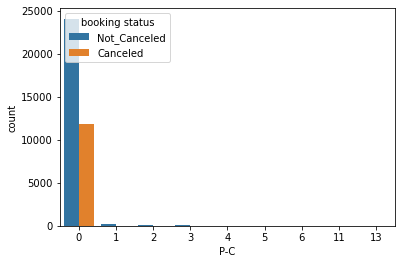

In [104]:
sns.countplot(x= disc_features.iloc[:,9], hue=target.squeeze())
plt.show()

###### P-not-C

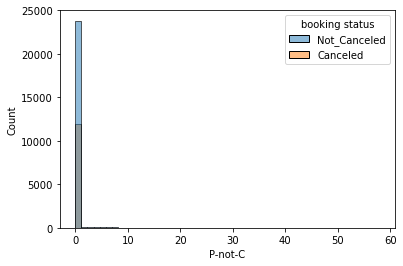

In [105]:
sns.histplot(x= disc_features.iloc[:,10], bins= 50, hue=target.squeeze())
plt.show()

###### Special Requests

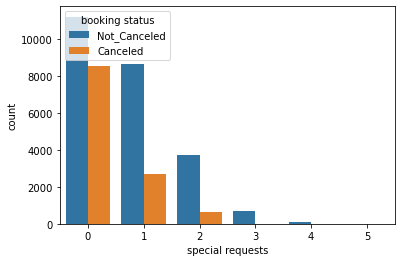

In [106]:
sns.countplot(x= disc_features.iloc[:,11], hue=target.squeeze())
plt.show()

###### Month

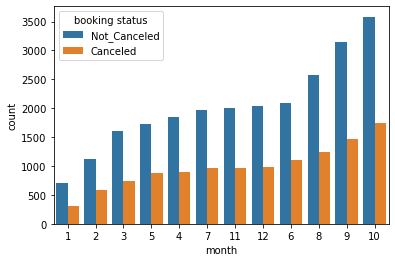

In [107]:
sns.countplot(data= data, x='month', order=data['month'].value_counts(ascending=True).index, hue=target.squeeze())
plt.show()

## Bivariate Analysis

### Correrlation

<AxesSubplot:>

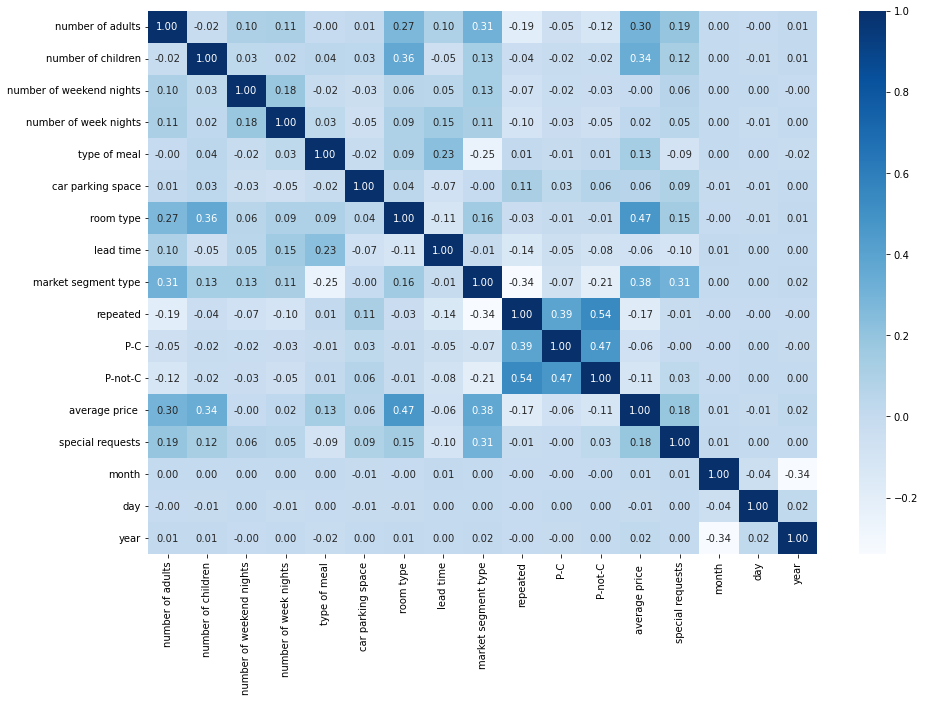

In [108]:
plt.figure(figsize=(15,10))
sns.heatmap(features.corr(), annot=True, cmap="Blues", fmt=".2f")

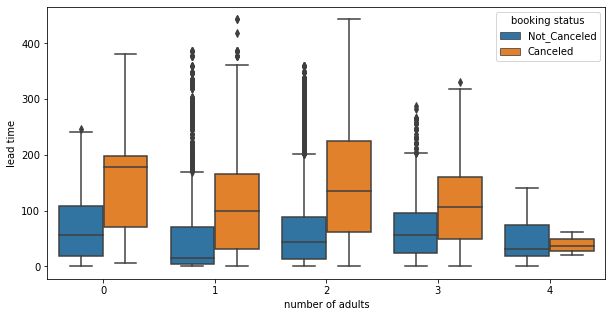

In [109]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,0], y=con_features.iloc[:,0], hue= target.squeeze())
plt.show()

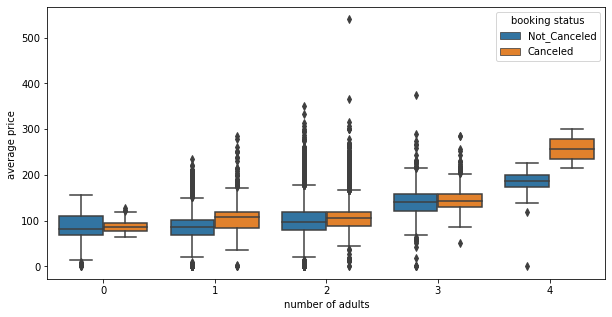

In [110]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,0], y=con_features.iloc[:,1], hue= target.squeeze())
plt.show()

In [111]:
data[data["number of adults"] == 2]["average price "].max()

540.0

In [112]:
data[data["number of adults"] == 3]["average price "].max()

375.5

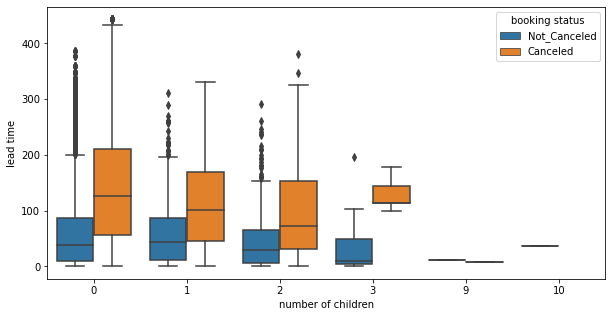

In [113]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,1], y=con_features.iloc[:,0], hue= target.squeeze())
plt.show()

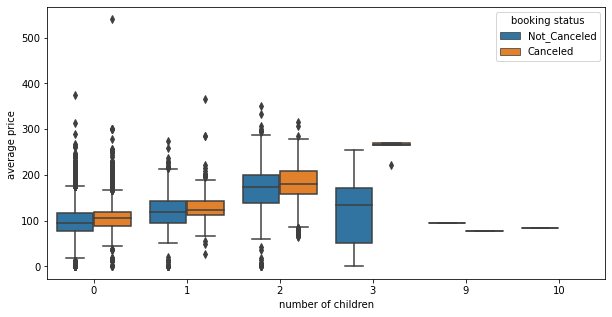

In [114]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,1], y=con_features.iloc[:,1], hue= target.squeeze())
plt.show()

In [115]:
# Maybe oulier
data[(data["number of children"] == 0) & (data["number of adults"] == 2) & (data["average price "] == 540)]

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,month,day,year
33114,2,0,0,1,1,0,1,35,3,0,0,0,540.0,0,Canceled,10,12,2017


In [116]:
data.drop(index= 33114, axis=0, inplace=True)

In [117]:
# Maybe oulier
data[(data["number of children"] == 0) & (data["number of adults"] == 2) & (data["average price "] == 540)]

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,month,day,year


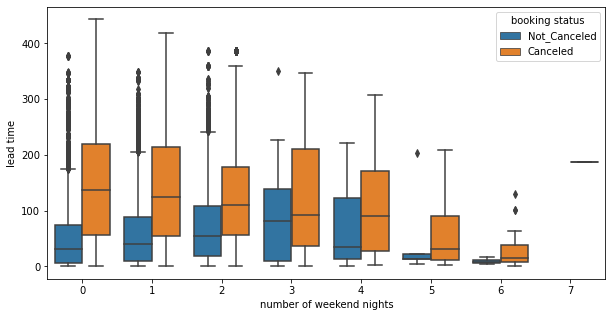

In [118]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,2], y=con_features.iloc[:,0], hue= target.squeeze())
plt.show()

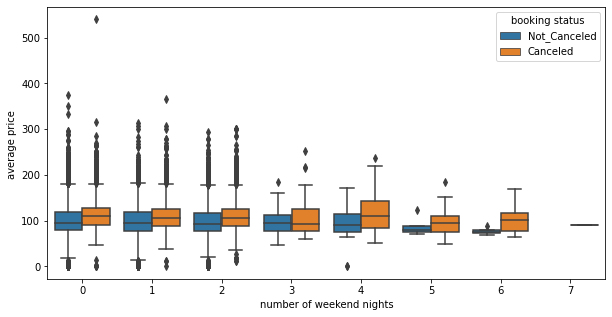

In [119]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,2], y=con_features.iloc[:,1], hue= target.squeeze())
plt.show()

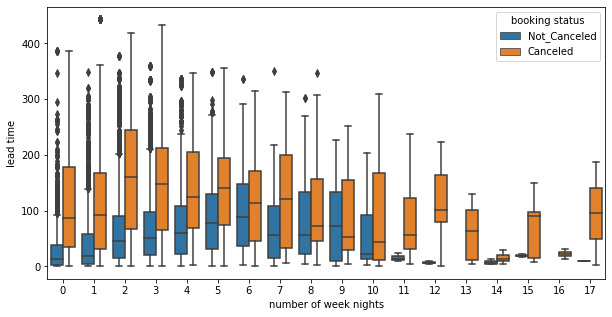

In [120]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,3], y=con_features.iloc[:,0], hue= target.squeeze())
plt.show()

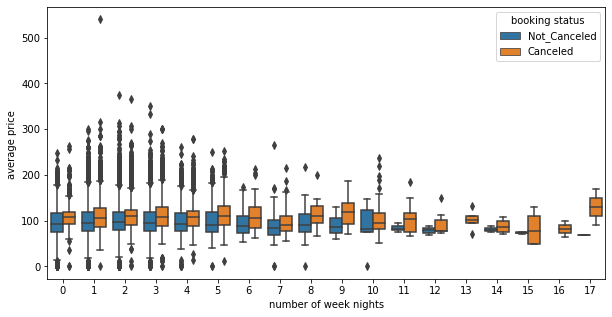

In [121]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,3], y=con_features.iloc[:,1], hue= target.squeeze())
plt.show()

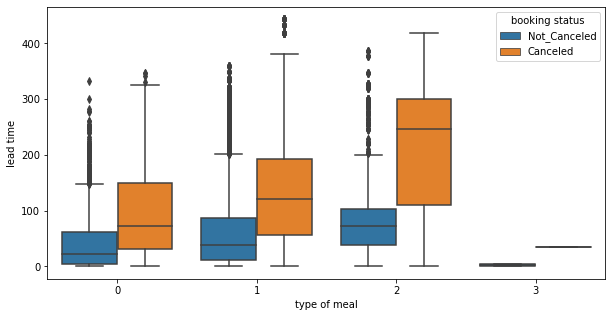

In [122]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,4], y=con_features.iloc[:,0], hue= target.squeeze())
plt.show()

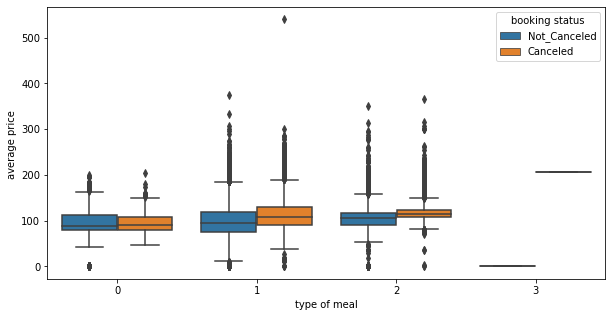

In [123]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,4], y=con_features.iloc[:,1], hue= target.squeeze())
plt.show()

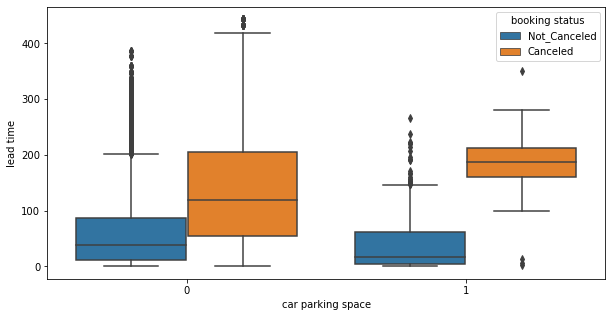

In [124]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,5], y=con_features.iloc[:,0], hue= target.squeeze())
plt.show()

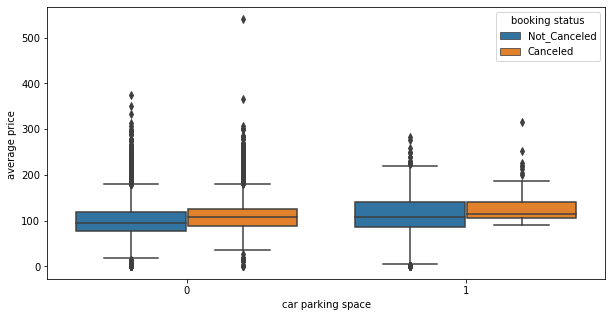

In [125]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,5], y=con_features.iloc[:,1], hue= target.squeeze())
plt.show()

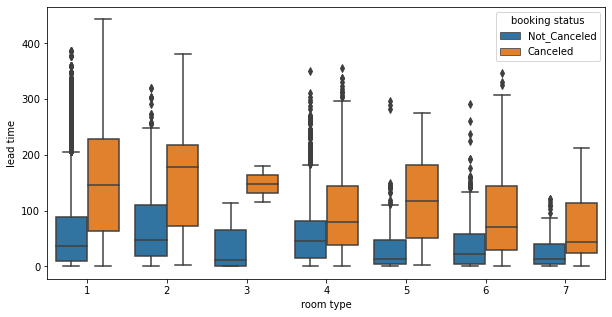

In [126]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,6], y=con_features.iloc[:,0], hue= target.squeeze())
plt.show()

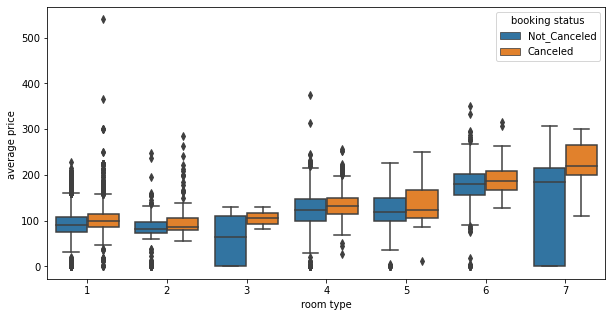

In [127]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,6], y=con_features.iloc[:,1], hue= target.squeeze())
plt.show()

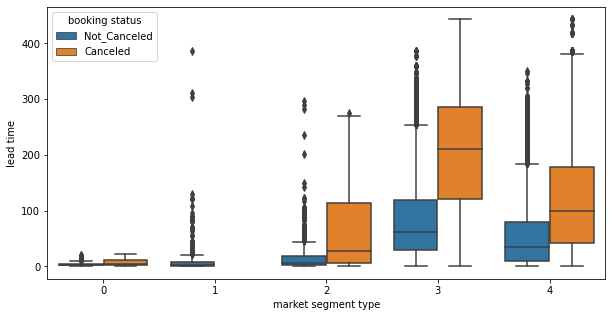

In [128]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,7], y=con_features.iloc[:,0], hue= target.squeeze())
plt.show()

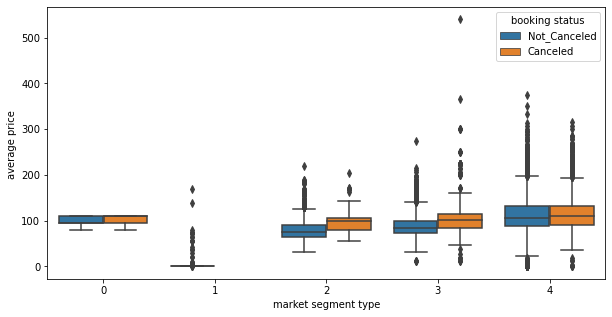

In [129]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,7], y=con_features.iloc[:,1], hue= target.squeeze())
plt.show()

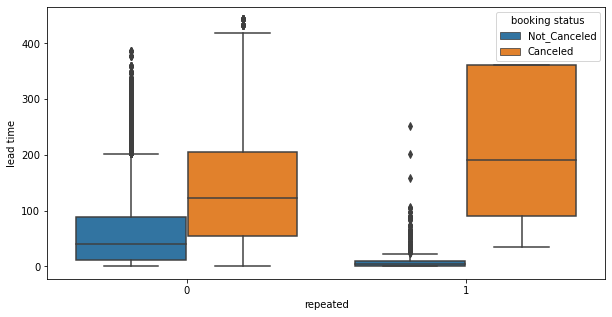

In [130]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,8], y=con_features.iloc[:,0], hue= target.squeeze())
plt.show()

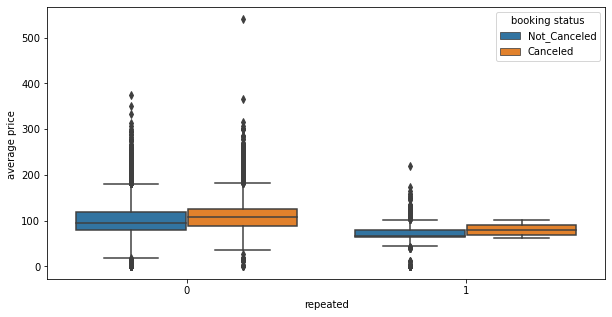

In [131]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,8], y=con_features.iloc[:,1], hue= target.squeeze())
plt.show()

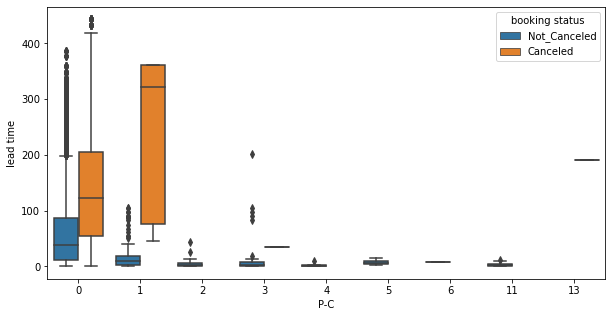

In [132]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,9], y=con_features.iloc[:,0], hue= target.squeeze())
plt.show()

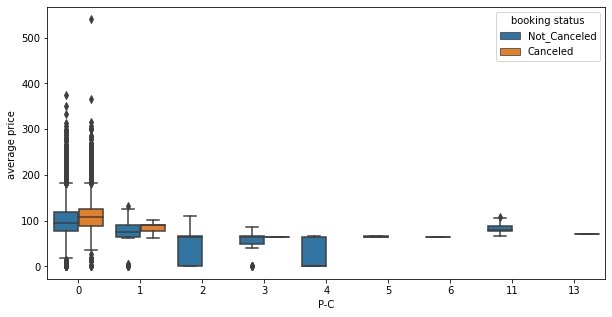

In [133]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,9], y=con_features.iloc[:,1], hue= target.squeeze())
plt.show()

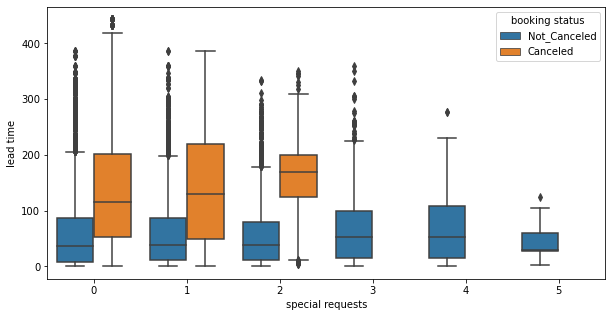

In [134]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,11], y=con_features.iloc[:,0], hue= target.squeeze())
plt.show()

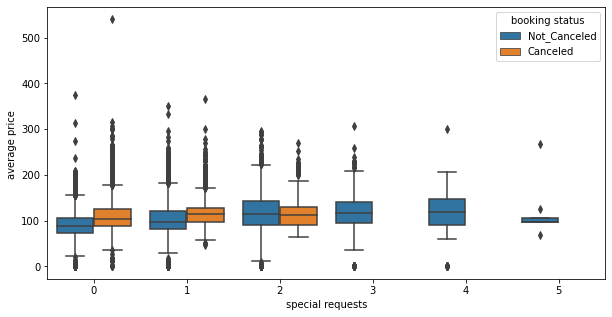

In [135]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,11], y=con_features.iloc[:,1], hue= target.squeeze())
plt.show()

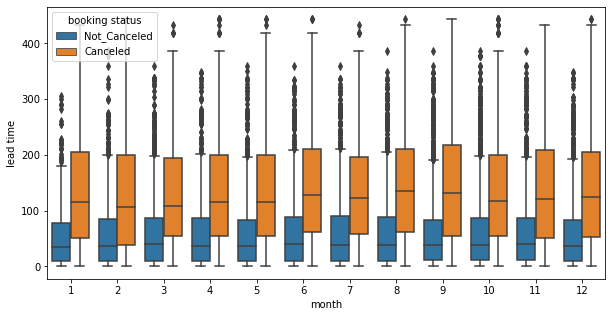

In [136]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,12], y=con_features.iloc[:,0], hue= target.squeeze())
plt.show()

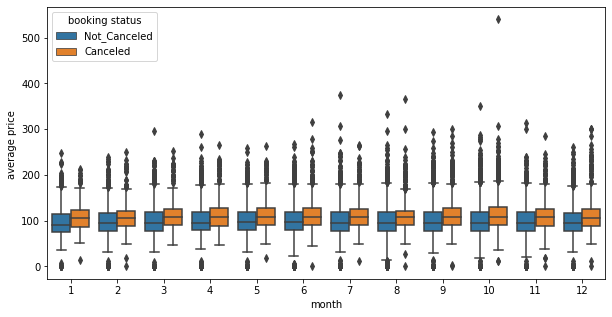

In [137]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,12], y=con_features.iloc[:,1], hue= target.squeeze() )
plt.show()

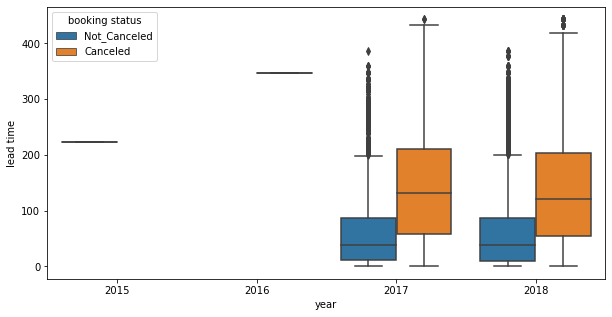

In [138]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,14], y=con_features.iloc[:,0], hue= target.squeeze())
plt.show()

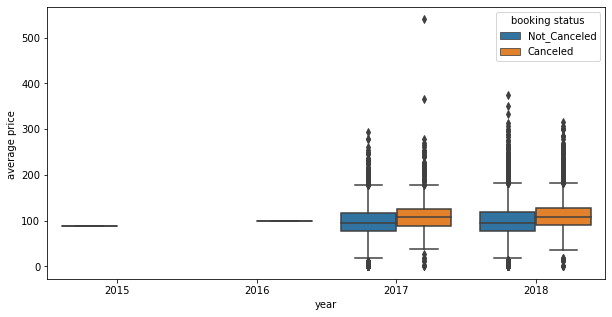

In [139]:
plt.figure(figsize=(10,5))
sns.boxplot(x=disc_features.iloc[:,14], y=con_features.iloc[:,1], hue= target.squeeze())
plt.show()

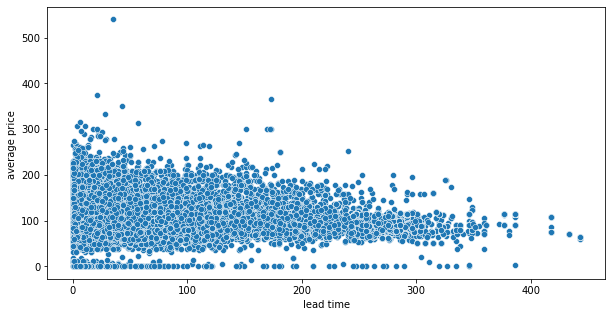

In [140]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= con_features["lead time"], y= con_features["average price "])
plt.show()

<Figure size 720x360 with 0 Axes>

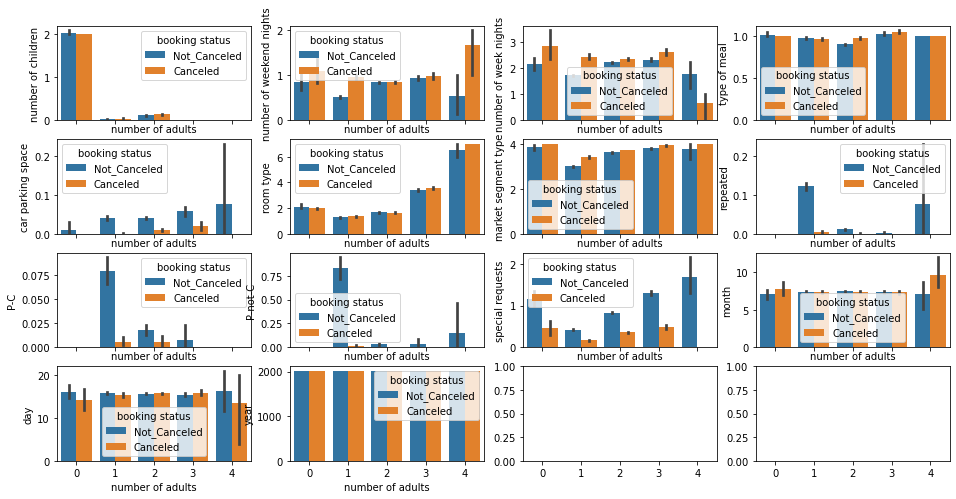

In [141]:
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(4,4, sharex=True, figsize=(16,8))

sns.barplot(ax= ax[0,0], x= disc_features.iloc[:,0], y= disc_features.iloc[:,1], hue= target.squeeze())
sns.barplot(ax= ax[0,1], x= disc_features.iloc[:,0], y= disc_features.iloc[:,2], hue= target.squeeze())
sns.barplot(ax= ax[0,2], x= disc_features.iloc[:,0], y= disc_features.iloc[:,3], hue= target.squeeze())
sns.barplot(ax= ax[0,3], x= disc_features.iloc[:,0], y= disc_features.iloc[:,4], hue= target.squeeze())
sns.barplot(ax= ax[1,0], x= disc_features.iloc[:,0], y= disc_features.iloc[:,5], hue= target.squeeze())
sns.barplot(ax= ax[1,1], x= disc_features.iloc[:,0], y= disc_features.iloc[:,6], hue= target.squeeze())
sns.barplot(ax= ax[1,2], x= disc_features.iloc[:,0], y= disc_features.iloc[:,7], hue= target.squeeze())
sns.barplot(ax= ax[1,3], x= disc_features.iloc[:,0], y= disc_features.iloc[:,8], hue= target.squeeze())
sns.barplot(ax= ax[2,0], x= disc_features.iloc[:,0], y= disc_features.iloc[:,9], hue= target.squeeze())
sns.barplot(ax= ax[2,1], x= disc_features.iloc[:,0], y= disc_features.iloc[:,10], hue= target.squeeze())
sns.barplot(ax= ax[2,2], x= disc_features.iloc[:,0], y= disc_features.iloc[:,11], hue= target.squeeze())
sns.barplot(ax= ax[2,3], x= disc_features.iloc[:,0], y= disc_features.iloc[:,12], hue= target.squeeze())
sns.barplot(ax= ax[3,0], x= disc_features.iloc[:,0], y= disc_features.iloc[:,13], hue= target.squeeze())
sns.barplot(ax= ax[3,1], x= disc_features.iloc[:,0], y= disc_features.iloc[:,14], hue= target.squeeze())



plt.show()

<Figure size 720x360 with 0 Axes>

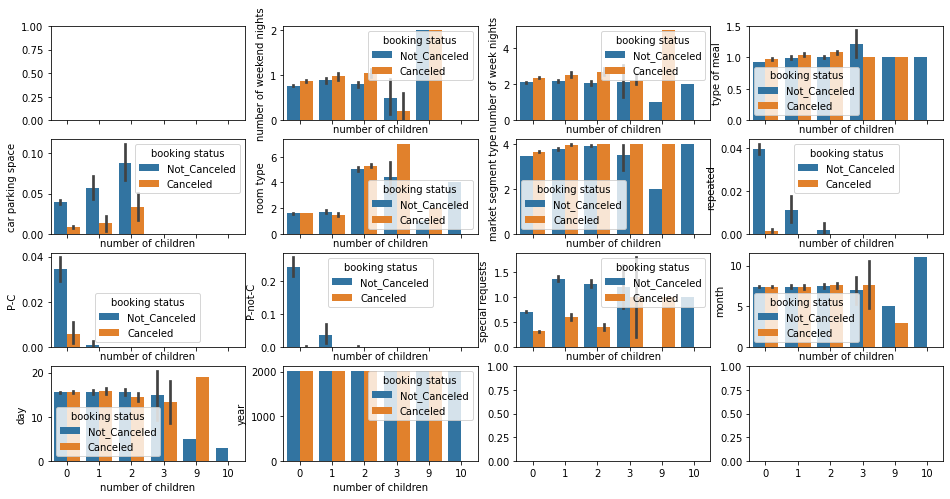

In [142]:
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(4,4, sharex=True, figsize=(16,8))

sns.barplot(ax= ax[0,1], x= disc_features.iloc[:,1], y= disc_features.iloc[:,2], hue= target.squeeze())
sns.barplot(ax= ax[0,2], x= disc_features.iloc[:,1], y= disc_features.iloc[:,3], hue= target.squeeze())
sns.barplot(ax= ax[0,3], x= disc_features.iloc[:,1], y= disc_features.iloc[:,4], hue= target.squeeze())
sns.barplot(ax= ax[1,0], x= disc_features.iloc[:,1], y= disc_features.iloc[:,5], hue= target.squeeze())
sns.barplot(ax= ax[1,1], x= disc_features.iloc[:,1], y= disc_features.iloc[:,6], hue= target.squeeze())
sns.barplot(ax= ax[1,2], x= disc_features.iloc[:,1], y= disc_features.iloc[:,7], hue= target.squeeze())
sns.barplot(ax= ax[1,3], x= disc_features.iloc[:,1], y= disc_features.iloc[:,8], hue= target.squeeze())
sns.barplot(ax= ax[2,0], x= disc_features.iloc[:,1], y= disc_features.iloc[:,9], hue= target.squeeze())
sns.barplot(ax= ax[2,1], x= disc_features.iloc[:,1], y= disc_features.iloc[:,10], hue= target.squeeze())
sns.barplot(ax= ax[2,2], x= disc_features.iloc[:,1], y= disc_features.iloc[:,11], hue= target.squeeze())
sns.barplot(ax= ax[2,3], x= disc_features.iloc[:,1], y= disc_features.iloc[:,12], hue= target.squeeze())
sns.barplot(ax= ax[3,0], x= disc_features.iloc[:,1], y= disc_features.iloc[:,13], hue= target.squeeze())
sns.barplot(ax= ax[3,1], x= disc_features.iloc[:,1], y= disc_features.iloc[:,14], hue= target.squeeze())





plt.show()

<Figure size 720x360 with 0 Axes>

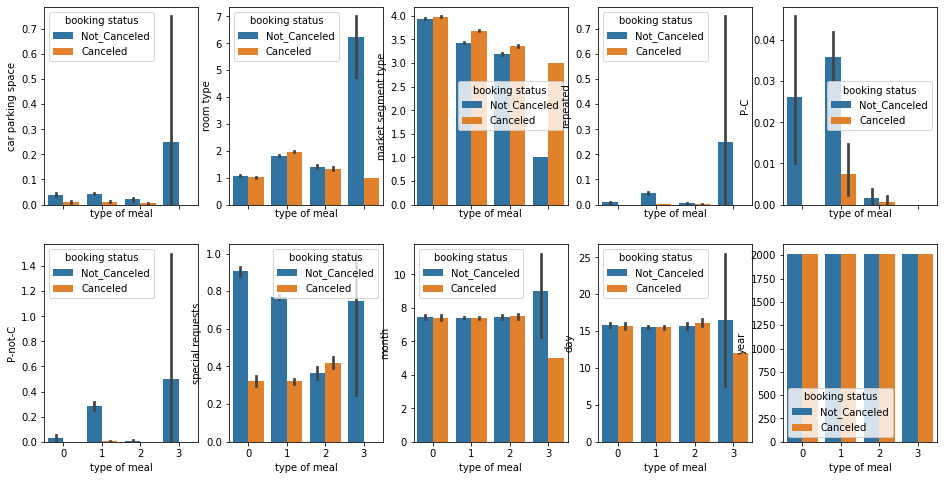

In [143]:
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(2,5, sharex=True, figsize=(16,8))


sns.barplot(ax= ax[0,0], x= disc_features.iloc[:,4], y= disc_features.iloc[:,5], hue= target.squeeze())
sns.barplot(ax= ax[0,1], x= disc_features.iloc[:,4], y= disc_features.iloc[:,6], hue= target.squeeze())
sns.barplot(ax= ax[0,2], x= disc_features.iloc[:,4], y= disc_features.iloc[:,7], hue= target.squeeze())
sns.barplot(ax= ax[0,3], x= disc_features.iloc[:,4], y= disc_features.iloc[:,8], hue= target.squeeze())
sns.barplot(ax= ax[0,4], x= disc_features.iloc[:,4], y= disc_features.iloc[:,9], hue= target.squeeze())
sns.barplot(ax= ax[1,0], x= disc_features.iloc[:,4], y= disc_features.iloc[:,10], hue= target.squeeze())
sns.barplot(ax= ax[1,1], x= disc_features.iloc[:,4], y= disc_features.iloc[:,11], hue= target.squeeze())
sns.barplot(ax= ax[1,2], x= disc_features.iloc[:,4], y= disc_features.iloc[:,12], hue= target.squeeze())
sns.barplot(ax= ax[1,3], x= disc_features.iloc[:,4], y= disc_features.iloc[:,13], hue= target.squeeze())
sns.barplot(ax= ax[1,4], x= disc_features.iloc[:,4], y= disc_features.iloc[:,14], hue= target.squeeze())





plt.show()

<Figure size 720x360 with 0 Axes>

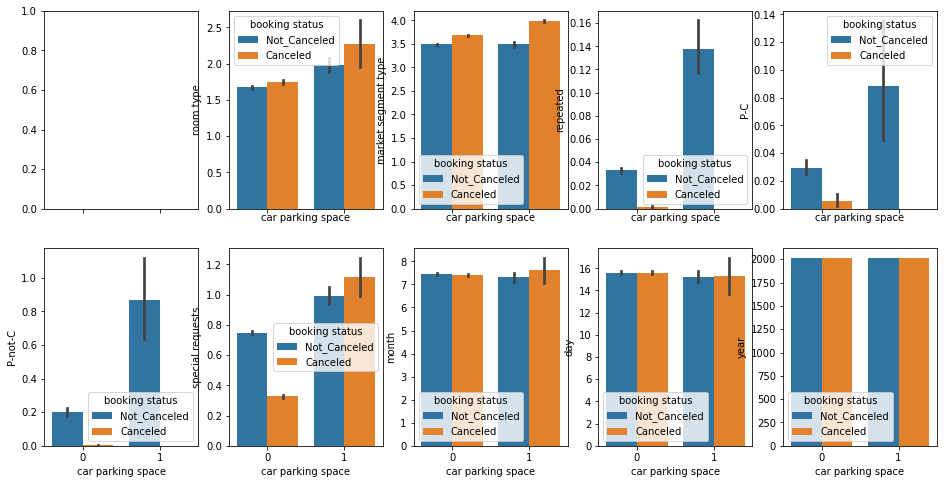

In [144]:
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(2,5, sharex=True, figsize=(16,8))


sns.barplot(ax= ax[0,1], x= disc_features.iloc[:,5], y= disc_features.iloc[:,6], hue= target.squeeze())
sns.barplot(ax= ax[0,2], x= disc_features.iloc[:,5], y= disc_features.iloc[:,7], hue= target.squeeze())
sns.barplot(ax= ax[0,3], x= disc_features.iloc[:,5], y= disc_features.iloc[:,8], hue= target.squeeze())
sns.barplot(ax= ax[0,4], x= disc_features.iloc[:,5], y= disc_features.iloc[:,9], hue= target.squeeze())
sns.barplot(ax= ax[1,0], x= disc_features.iloc[:,5], y= disc_features.iloc[:,10], hue= target.squeeze())
sns.barplot(ax= ax[1,1], x= disc_features.iloc[:,5], y= disc_features.iloc[:,11], hue= target.squeeze())
sns.barplot(ax= ax[1,2], x= disc_features.iloc[:,5], y= disc_features.iloc[:,12], hue= target.squeeze())
sns.barplot(ax= ax[1,3], x= disc_features.iloc[:,5], y= disc_features.iloc[:,13], hue= target.squeeze())
sns.barplot(ax= ax[1,4], x= disc_features.iloc[:,5], y= disc_features.iloc[:,14], hue= target.squeeze())





plt.show()

<Figure size 720x360 with 0 Axes>

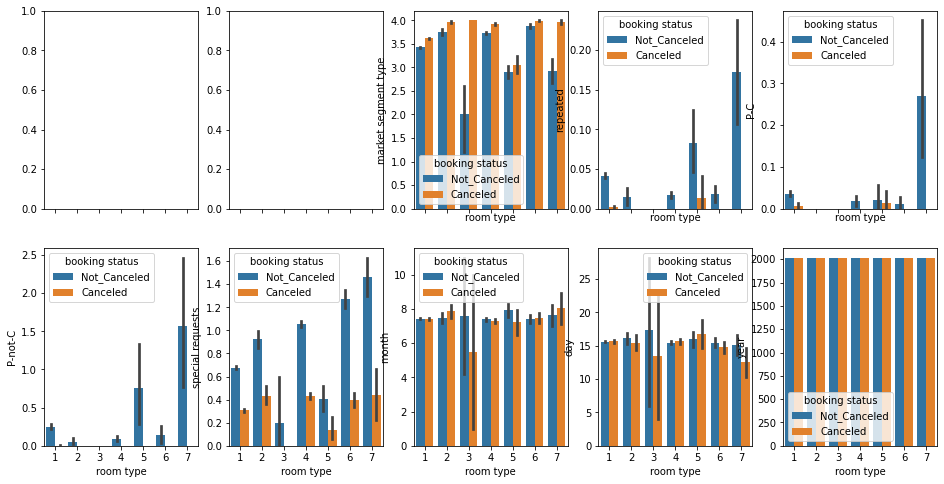

In [145]:
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(2,5, sharex=True, figsize=(16,8))


sns.barplot(ax= ax[0,2], x= disc_features.iloc[:,6], y= disc_features.iloc[:,7], hue= target.squeeze())
sns.barplot(ax= ax[0,3], x= disc_features.iloc[:,6], y= disc_features.iloc[:,8], hue= target.squeeze())
sns.barplot(ax= ax[0,4], x= disc_features.iloc[:,6], y= disc_features.iloc[:,9], hue= target.squeeze())
sns.barplot(ax= ax[1,0], x= disc_features.iloc[:,6], y= disc_features.iloc[:,10], hue= target.squeeze())
sns.barplot(ax= ax[1,1], x= disc_features.iloc[:,6], y= disc_features.iloc[:,11], hue= target.squeeze())
sns.barplot(ax= ax[1,2], x= disc_features.iloc[:,6], y= disc_features.iloc[:,12], hue= target.squeeze())
sns.barplot(ax= ax[1,3], x= disc_features.iloc[:,6], y= disc_features.iloc[:,13], hue= target.squeeze())
sns.barplot(ax= ax[1,4], x= disc_features.iloc[:,6], y= disc_features.iloc[:,14], hue= target.squeeze())





plt.show()

<Figure size 720x360 with 0 Axes>

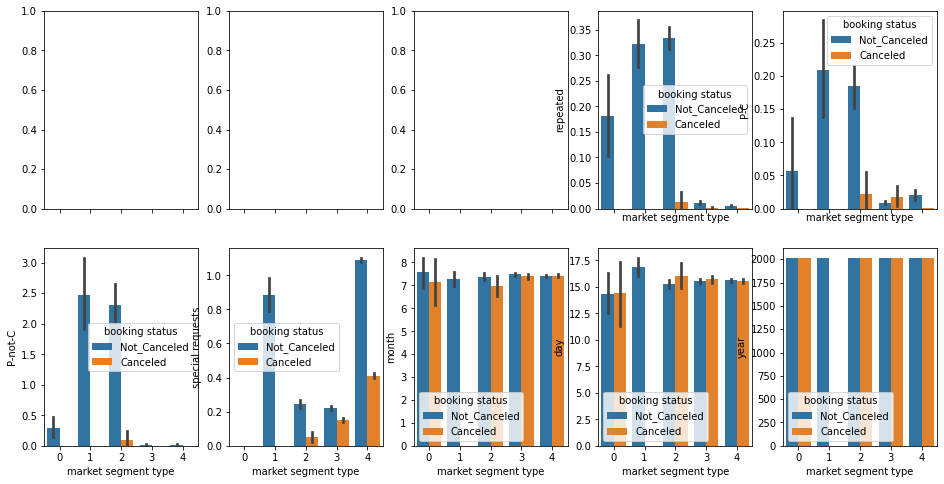

In [146]:
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(2,5, sharex=True, figsize=(16,8))


sns.barplot(ax= ax[0,3], x= disc_features.iloc[:,7], y= disc_features.iloc[:,8], hue= target.squeeze())
sns.barplot(ax= ax[0,4], x= disc_features.iloc[:,7], y= disc_features.iloc[:,9], hue= target.squeeze())
sns.barplot(ax= ax[1,0], x= disc_features.iloc[:,7], y= disc_features.iloc[:,10], hue= target.squeeze())
sns.barplot(ax= ax[1,1], x= disc_features.iloc[:,7], y= disc_features.iloc[:,11], hue= target.squeeze())
sns.barplot(ax= ax[1,2], x= disc_features.iloc[:,7], y= disc_features.iloc[:,12], hue= target.squeeze())
sns.barplot(ax= ax[1,3], x= disc_features.iloc[:,7], y= disc_features.iloc[:,13], hue= target.squeeze())
sns.barplot(ax= ax[1,4], x= disc_features.iloc[:,7], y= disc_features.iloc[:,14], hue= target.squeeze())





plt.show()

<Figure size 720x360 with 0 Axes>

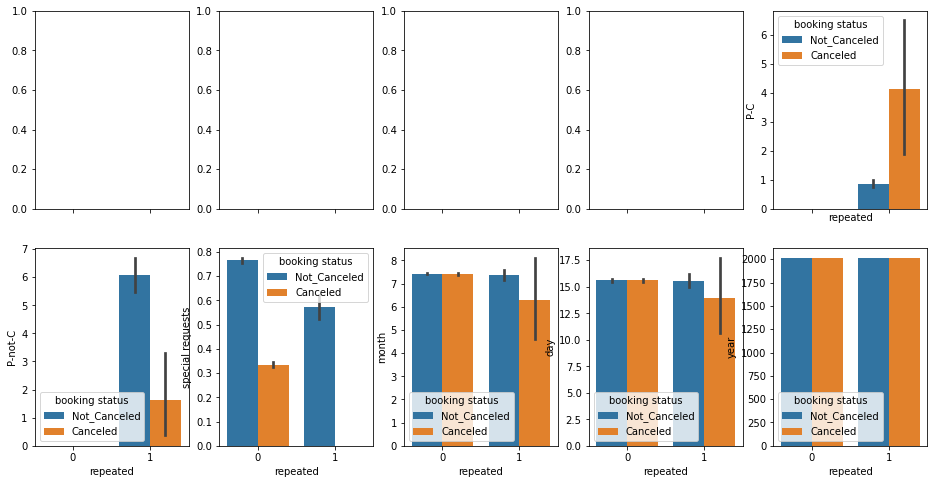

In [147]:
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(2,5, sharex=True, figsize=(16,8))


sns.barplot(ax= ax[0,4], x= disc_features.iloc[:,8], y= disc_features.iloc[:,9], hue= target.squeeze())
sns.barplot(ax= ax[1,0], x= disc_features.iloc[:,8], y= disc_features.iloc[:,10], hue= target.squeeze())
sns.barplot(ax= ax[1,1], x= disc_features.iloc[:,8], y= disc_features.iloc[:,11], hue= target.squeeze())
sns.barplot(ax= ax[1,2], x= disc_features.iloc[:,8], y= disc_features.iloc[:,12], hue= target.squeeze())
sns.barplot(ax= ax[1,3], x= disc_features.iloc[:,8], y= disc_features.iloc[:,13], hue= target.squeeze())
sns.barplot(ax= ax[1,4], x= disc_features.iloc[:,8], y= disc_features.iloc[:,14], hue= target.squeeze())





plt.show()

<Figure size 720x576 with 0 Axes>

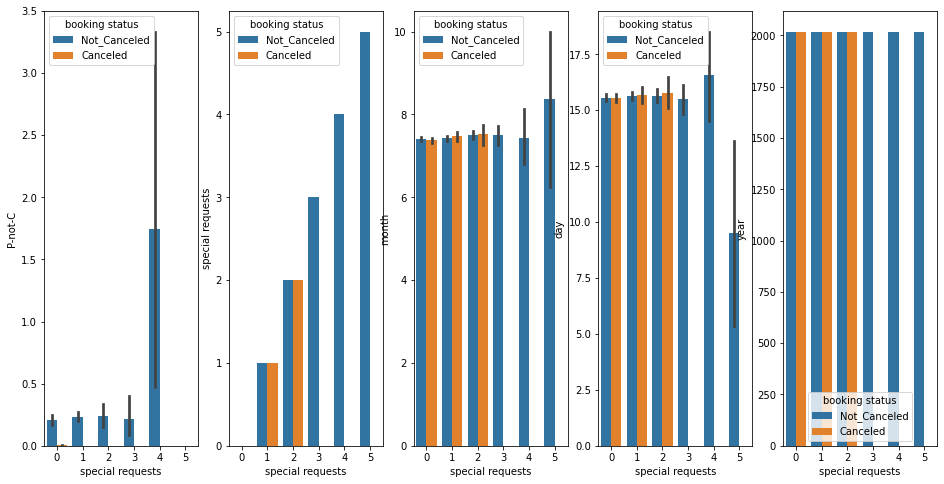

In [148]:
plt.figure(figsize=(10,8))
fig, ax = plt.subplots(1,5, sharex=True, figsize=(16,8))


sns.barplot(ax= ax[0], x= disc_features.iloc[:,11], y= disc_features.iloc[:,10], hue= target.squeeze())
sns.barplot(ax= ax[1], x= disc_features.iloc[:,11], y= disc_features.iloc[:,11], hue= target.squeeze())
sns.barplot(ax= ax[2], x= disc_features.iloc[:,11], y= disc_features.iloc[:,12], hue= target.squeeze())
sns.barplot(ax= ax[3], x= disc_features.iloc[:,11], y= disc_features.iloc[:,13], hue= target.squeeze())
sns.barplot(ax= ax[4], x= disc_features.iloc[:,11], y= disc_features.iloc[:,14], hue= target.squeeze())





plt.show()

<Figure size 360x576 with 0 Axes>

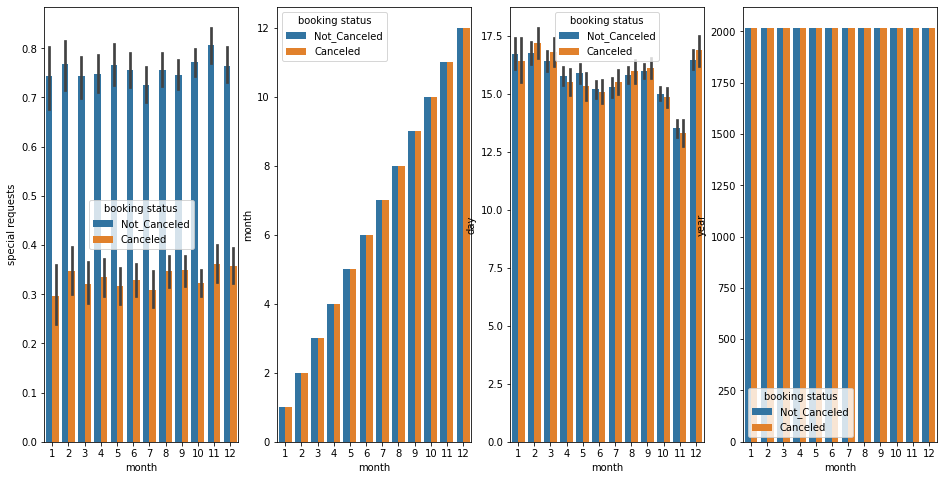

In [149]:
plt.figure(figsize=(5,8))
fig, ax = plt.subplots(1,4, sharex=True, figsize=(16,8))


sns.barplot(ax= ax[0], x= disc_features.iloc[:,12], y= disc_features.iloc[:,11], hue= target.squeeze())
sns.barplot(ax= ax[1], x= disc_features.iloc[:,12], y= disc_features.iloc[:,12], hue= target.squeeze())
sns.barplot(ax= ax[2], x= disc_features.iloc[:,12], y= disc_features.iloc[:,13], hue= target.squeeze())
sns.barplot(ax= ax[3], x= disc_features.iloc[:,12], y= disc_features.iloc[:,14], hue= target.squeeze())





plt.show()

<Figure size 360x576 with 0 Axes>

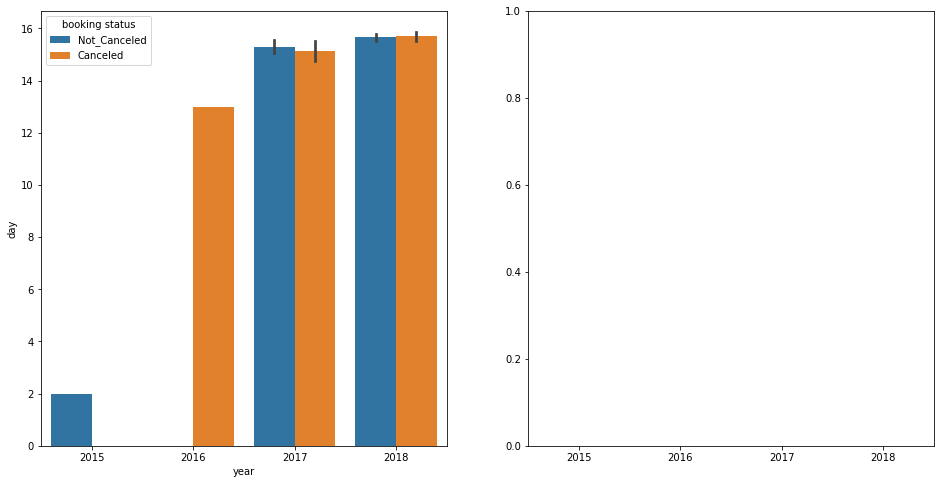

In [150]:
plt.figure(figsize=(5,8))
fig, ax = plt.subplots(1,2, sharex=True, figsize=(16,8))


sns.barplot(ax= ax[0], x= disc_features.iloc[:,14], y= disc_features.iloc[:,13], hue= target.squeeze())


plt.show()

In [151]:
features["year"].unique()

array([-7.33994291,  0.46772107, -2.13483359, -4.73738825])

### Encoding Target

In [152]:
target.replace("Not_Canceled", 0, inplace= True)
target.replace("Canceled", 1, inplace= True)

In [153]:
target

,booking status
0,0
1,0
2,1
3,1
4,1
...,...
36280,1
36281,0
36282,0
36283,0


In [154]:
features

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,month,day,year
0,-1.628431,2.221609,1.366111,1.981250,0.104223,-0.178794,-0.506408,1.614661,-0.810717,-0.162187,-0.063385,-0.087444,-0.439538,-0.788212,0.839179,-1.555650,-7.339943
1,-1.628431,-0.261636,0.217450,0.563741,-1.978232,-0.178794,-0.506408,-0.933699,0.656678,-0.162187,-0.063385,-0.087444,0.092868,0.483646,1.164923,-1.097994,0.467721
2,0.299073,2.221609,0.217450,0.563741,0.104223,-0.178794,-0.506408,-0.980244,0.656678,-0.162187,-0.063385,-0.087444,-1.522592,-0.788212,-1.766776,1.419110,0.467721
3,-1.628431,-0.261636,-0.931212,-0.145013,0.104223,-0.178794,-0.506408,1.463389,0.656678,-0.162187,-0.063385,-0.087444,-0.097521,0.483646,-0.789543,0.503799,-2.134834
4,-1.628431,-0.261636,0.217450,-0.145013,-1.978232,-0.178794,-0.506408,-0.433336,0.656678,-0.162187,-0.063385,-0.087444,-0.753054,-0.788212,-1.115287,-0.525925,0.467721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,0.299073,-0.261636,-0.931212,-0.145013,2.186679,-0.178794,-0.506408,3.034296,0.656678,-0.162187,-0.063385,-0.087444,0.330000,0.483646,-1.766776,1.533524,0.467721
36281,0.299073,-0.261636,0.217450,0.563741,0.104223,-0.178794,-0.506408,-0.596245,0.656678,-0.162187,-0.063385,-0.087444,0.117664,0.483646,-1.766776,1.533524,0.467721
36282,0.299073,-0.261636,0.217450,0.563741,0.104223,-0.178794,1.636784,-0.026064,0.656678,-0.162187,-0.063385,-0.087444,0.062371,0.483646,-1.766776,1.533524,0.467721
36283,2.226577,-0.261636,-0.931212,1.272496,0.104223,-0.178794,-0.506408,0.416118,-0.810717,-0.162187,-0.063385,-0.087444,-0.185876,0.483646,-1.766776,1.533524,0.467721


In [155]:
features_cols= features.columns

In [156]:
normalize = MinMaxScaler()
normalize.fit(features)

MinMaxScaler()

In [157]:
features= normalize.transform(features)
features= pd.DataFrame(features, columns= features_cols)

In [158]:
features

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,month,day,year
0,0.25,0.1,0.285714,0.294118,0.333333,0.0,0.0,0.505643,0.75,0.0,0.0,0.0,0.162963,0.0,0.818182,0.033333,0.000000
1,0.25,0.0,0.142857,0.176471,0.000000,0.0,0.0,0.011287,1.00,0.0,0.0,0.0,0.197556,0.2,0.909091,0.166667,1.000000
2,0.50,0.1,0.142857,0.176471,0.333333,0.0,0.0,0.002257,1.00,0.0,0.0,0.0,0.092593,0.0,0.090909,0.900000,1.000000
3,0.25,0.0,0.000000,0.117647,0.333333,0.0,0.0,0.476298,1.00,0.0,0.0,0.0,0.185185,0.2,0.363636,0.633333,0.666667
4,0.25,0.0,0.142857,0.117647,0.000000,0.0,0.0,0.108352,1.00,0.0,0.0,0.0,0.142593,0.0,0.272727,0.333333,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,0.50,0.0,0.000000,0.117647,0.666667,0.0,0.0,0.781038,1.00,0.0,0.0,0.0,0.212963,0.2,0.090909,0.933333,1.000000
36281,0.50,0.0,0.142857,0.176471,0.333333,0.0,0.0,0.076749,1.00,0.0,0.0,0.0,0.199167,0.2,0.090909,0.933333,1.000000
36282,0.50,0.0,0.142857,0.176471,0.333333,0.0,0.5,0.187359,1.00,0.0,0.0,0.0,0.195574,0.2,0.090909,0.933333,1.000000
36283,0.75,0.0,0.000000,0.235294,0.333333,0.0,0.0,0.273138,0.75,0.0,0.0,0.0,0.179444,0.2,0.090909,0.933333,1.000000


## PolynomialFeatures

In [159]:
poly = PolynomialFeatures(degree= 3, include_bias= False)
poly.fit(con_features)

PolynomialFeatures(degree=3, include_bias=False)

In [160]:
con_features_poly = poly.transform(con_features)

In [161]:
con_features_poly.shape

(36285, 9)

In [162]:
df_con_poly_features = pd.DataFrame(con_features_poly)
df_con_poly_features

,0,1,2,3,4,5,6,7,8
0,224.0,88.00,50176.0,19712.00,7744.0000,11239424.0,4415488.00,1.734656e+06,6.814720e+05
1,5.0,106.68,25.0,533.40,11380.6224,125.0,2667.00,5.690311e+04,1.214085e+06
2,1.0,50.00,1.0,50.00,2500.0000,1.0,50.00,2.500000e+03,1.250000e+05
3,211.0,100.00,44521.0,21100.00,10000.0000,9393931.0,4452100.00,2.110000e+06,1.000000e+06
4,48.0,77.00,2304.0,3696.00,5929.0000,110592.0,177408.00,2.845920e+05,4.565330e+05
...,...,...,...,...,...,...,...,...,...
36280,346.0,115.00,119716.0,39790.00,13225.0000,41421736.0,13767340.00,4.575850e+06,1.520875e+06
36281,34.0,107.55,1156.0,3656.70,11567.0025,39304.0,124327.80,3.932781e+05,1.244031e+06
36282,83.0,105.61,6889.0,8765.63,11153.4721,571787.0,727547.29,9.257382e+05,1.177918e+06
36283,121.0,96.90,14641.0,11724.90,9389.6100,1771561.0,1418712.90,1.136143e+06,9.098532e+05


## One Hot-Encoding

In [163]:
# features = pd.get_dummies(features, columns= ["type of meal", "market segment type", "room type", "year"], drop_first=True)

In [164]:
features = features.join(df_con_poly_features, lsuffix='data', rsuffix='df_con_poly_features')
features

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,...,year,0,1,2,3,4,5,6,7,8
0,0.25,0.1,0.285714,0.294118,0.333333,0.0,0.0,0.505643,0.75,0.0,...,0.000000,224.0,88.00,50176.0,19712.00,7744.0000,11239424.0,4415488.00,1.734656e+06,6.814720e+05
1,0.25,0.0,0.142857,0.176471,0.000000,0.0,0.0,0.011287,1.00,0.0,...,1.000000,5.0,106.68,25.0,533.40,11380.6224,125.0,2667.00,5.690311e+04,1.214085e+06
2,0.50,0.1,0.142857,0.176471,0.333333,0.0,0.0,0.002257,1.00,0.0,...,1.000000,1.0,50.00,1.0,50.00,2500.0000,1.0,50.00,2.500000e+03,1.250000e+05
3,0.25,0.0,0.000000,0.117647,0.333333,0.0,0.0,0.476298,1.00,0.0,...,0.666667,211.0,100.00,44521.0,21100.00,10000.0000,9393931.0,4452100.00,2.110000e+06,1.000000e+06
4,0.25,0.0,0.142857,0.117647,0.000000,0.0,0.0,0.108352,1.00,0.0,...,1.000000,48.0,77.00,2304.0,3696.00,5929.0000,110592.0,177408.00,2.845920e+05,4.565330e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,0.50,0.0,0.000000,0.117647,0.666667,0.0,0.0,0.781038,1.00,0.0,...,1.000000,346.0,115.00,119716.0,39790.00,13225.0000,41421736.0,13767340.00,4.575850e+06,1.520875e+06
36281,0.50,0.0,0.142857,0.176471,0.333333,0.0,0.0,0.076749,1.00,0.0,...,1.000000,34.0,107.55,1156.0,3656.70,11567.0025,39304.0,124327.80,3.932781e+05,1.244031e+06
36282,0.50,0.0,0.142857,0.176471,0.333333,0.0,0.5,0.187359,1.00,0.0,...,1.000000,83.0,105.61,6889.0,8765.63,11153.4721,571787.0,727547.29,9.257382e+05,1.177918e+06
36283,0.75,0.0,0.000000,0.235294,0.333333,0.0,0.0,0.273138,0.75,0.0,...,1.000000,121.0,96.90,14641.0,11724.90,9389.6100,1771561.0,1418712.90,1.136143e+06,9.098532e+05


In [165]:
features.columns = features.columns.astype(str)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=42)

In [167]:
X_train

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,...,year,0,1,2,3,4,5,6,7,8
387,0.75,0.0,0.142857,0.176471,0.333333,0.0,0.500000,0.349887,1.00,0.0,...,1.000000,155.0,115.6,24025.0,17918.0,13363.36,3723875.0,2777290.0,2071320.80,1.544804e+06
7768,0.25,0.0,0.285714,0.117647,0.333333,0.0,0.500000,0.108352,1.00,0.0,...,1.000000,48.0,149.4,2304.0,7171.2,22320.36,110592.0,344217.6,1071377.28,3.334662e+06
11792,0.50,0.0,0.142857,0.117647,0.333333,0.0,0.000000,0.688488,0.75,0.0,...,0.666667,305.0,89.0,93025.0,27145.0,7921.00,28372625.0,8279225.0,2415905.00,7.049690e+05
7978,0.25,0.0,0.000000,0.117647,0.333333,0.0,0.000000,0.230248,1.00,0.0,...,1.000000,102.0,86.4,10404.0,8812.8,7464.96,1061208.0,898905.6,761425.92,6.449725e+05
10670,0.50,0.2,0.142857,0.117647,0.333333,0.0,0.833333,0.020316,1.00,0.0,...,1.000000,9.0,221.0,81.0,1989.0,48841.00,729.0,17901.0,439569.00,1.079386e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0.50,0.0,0.285714,0.117647,0.333333,0.0,0.000000,0.097065,0.75,0.0,...,0.666667,43.0,55.0,1849.0,2365.0,3025.00,79507.0,101695.0,130075.00,1.663750e+05
6265,0.25,0.0,0.000000,0.117647,0.666667,0.0,0.000000,0.230248,1.00,0.0,...,1.000000,102.0,80.0,10404.0,8160.0,6400.00,1061208.0,832320.0,652800.00,5.120000e+05
11284,0.50,0.0,0.000000,0.117647,0.333333,0.0,0.000000,0.011287,0.50,0.0,...,1.000000,5.0,110.0,25.0,550.0,12100.00,125.0,2750.0,60500.00,1.331000e+06
860,0.50,0.0,0.000000,0.176471,0.333333,0.0,0.000000,0.480813,1.00,0.0,...,1.000000,213.0,130.0,45369.0,27690.0,16900.00,9663597.0,5897970.0,3599700.00,2.197000e+06


In [168]:
X_train.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'month', 'day', 'year',
       '0', '1', '2', '3', '4', '5', '6', '7', '8'],
      dtype='object')

## Random Forest

#### Model

In [169]:
RF = RandomForestClassifier(n_estimators=270, 
                            max_depth=20, 
                            random_state= 0, 
                            n_jobs= -1, 
                            oob_score= True)
RF.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=20, n_estimators=270, n_jobs=-1,
                       oob_score=True, random_state=0)

In [170]:
rf_prediction = RF.predict(X_test)
accuracy_score(y_test, rf_prediction)

0.8871434477056634

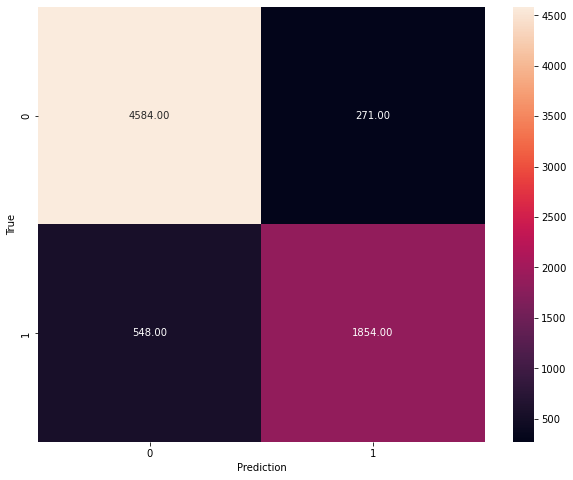

In [171]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, rf_prediction), annot= True, fmt=".2f")

plt.xlabel("Prediction")
plt.ylabel("True")

plt.show()

In [172]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4855
           1       0.87      0.77      0.82      2402

    accuracy                           0.89      7257
   macro avg       0.88      0.86      0.87      7257
weighted avg       0.89      0.89      0.89      7257



In [173]:
len(RF.feature_names_in_)

26

In [174]:
pickle.dump(RF, open("model.pkl", "wb"))

#### Tuning

In [121]:
param_grid = {"n_estimators" : [270, 400, 500],
              "max_depth": [20, 25, 30]
             }

g_cv = GridSearchCV(RF, param_grid=param_grid, scoring="neg_mean_squared_error", cv= 5, verbose= 6, n_jobs=-1)
g_cv.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, n_estimators=270,
                                              n_jobs=-1, oob_score=True,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30],
                         'n_estimators': [270, 400, 500]},
             scoring='neg_mean_squared_error', verbose=6)

In [122]:
g_cv.best_params_

{'max_depth': 20, 'n_estimators': 270}

### KNN

#### Model

In [175]:
knn = KNeighborsClassifier(n_neighbors=81, metric='minkowski', p=1, weights= 'distance') 
knn.fit(X_train.values, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=81, p=1, weights='distance')

In [176]:
knn_prediction = knn.predict(X_test.values)

In [177]:
accuracy_score(y_test, knn_prediction)

0.8170042717376327

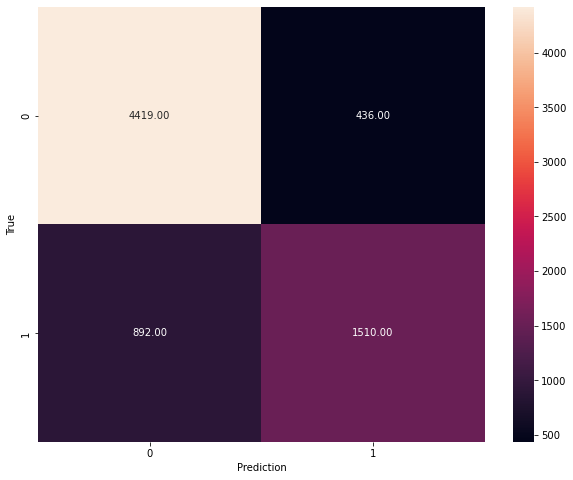

In [178]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, knn_prediction), annot= True, fmt=".2f")

plt.xlabel("Prediction")
plt.ylabel("True")

plt.show()

In [179]:
print(classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4855
           1       0.78      0.63      0.69      2402

    accuracy                           0.82      7257
   macro avg       0.80      0.77      0.78      7257
weighted avg       0.81      0.82      0.81      7257



#### Tuning

In [129]:
param_grid = {"n_neighbors" : [71, 81],
              "p": [1, 2]
             }

g_cv = GridSearchCV(knn, param_grid=param_grid, scoring="neg_mean_squared_error", cv= 5, verbose= 6, n_jobs=-1)
g_cv.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(n_neighbors=81, p=1,
                                            weights='distance'),
             n_jobs=-1, param_grid={'n_neighbors': [71, 81], 'p': [1, 2]},
             scoring='neg_mean_squared_error', verbose=6)

In [130]:
g_cv.best_params_

{'n_neighbors': 81, 'p': 1}

## Logistic Regression

## Model

In [180]:
LR = LogisticRegression(penalty= "l2", C= .01, random_state= 42, solver= "lbfgs", max_iter= 10000)
LR.fit(X_train, np.ravel(y_train))

LogisticRegression(C=0.01, max_iter=10000, random_state=42)

In [181]:
lr_prediction = LR.predict(X_test)

In [182]:
accuracy_score(y_test, lr_prediction)

0.7625740664186302

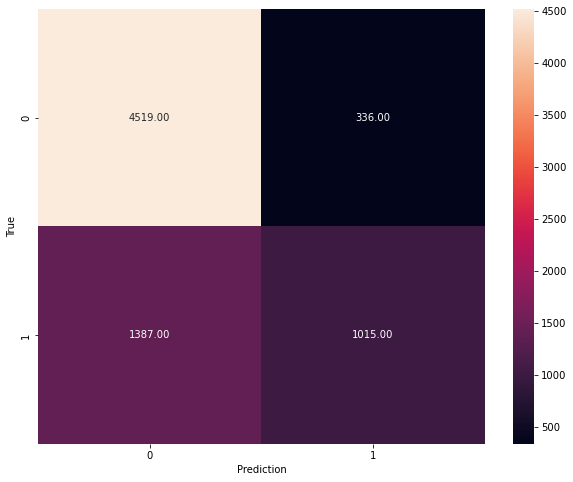

In [183]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, lr_prediction), annot= True, fmt=".2f")

plt.xlabel("Prediction")
plt.ylabel("True")

plt.show()

In [184]:
print(classification_report(y_test, lr_prediction))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      4855
           1       0.75      0.42      0.54      2402

    accuracy                           0.76      7257
   macro avg       0.76      0.68      0.69      7257
weighted avg       0.76      0.76      0.74      7257



#### Tuning

In [136]:
param_grid = {
              "C": [.00001, .01, .1]
             }

g_cv = GridSearchCV(LR, param_grid=param_grid, scoring="neg_mean_squared_error", cv= 5, verbose= 6, n_jobs=-1)
g_cv.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(C=0.01, max_iter=10000,
                                          random_state=42),
             n_jobs=-1, param_grid={'C': [1e-05, 0.01, 0.1]},
             scoring='neg_mean_squared_error', verbose=6)

In [137]:
g_cv.best_params_

{'C': 1e-05}

## SVM

In [185]:
SVM= LinearSVC(C= 1, random_state= 42, dual= "auto")
SVM.fit(X_train, np.ravel(y_train))

LinearSVC(C=1, dual='auto', random_state=42)

In [186]:
svm_prediction = SVM.predict(X_test)
accuracy_score(y_test, svm_prediction)

0.762436268430481

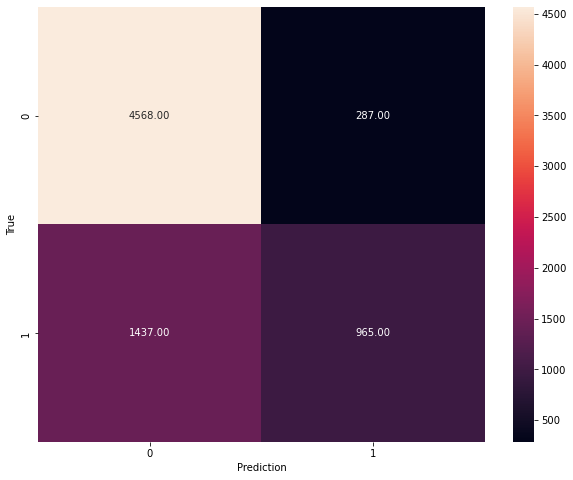

In [187]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, svm_prediction), annot= True, fmt=".2f")

plt.xlabel("Prediction")
plt.ylabel("True")

plt.show()

In [188]:
print(classification_report(y_test, svm_prediction))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84      4855
           1       0.77      0.40      0.53      2402

    accuracy                           0.76      7257
   macro avg       0.77      0.67      0.68      7257
weighted avg       0.76      0.76      0.74      7257



#### Tuning

In [142]:
param_grid = {
              "C": [.2, .4, 1]
             }

g_cv = GridSearchCV(SVM, param_grid=param_grid, scoring="neg_mean_squared_error", cv= 5, verbose= 6, n_jobs=-1)
g_cv.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=LinearSVC(C=1, dual='auto', random_state=42),
             n_jobs=-1, param_grid={'C': [0.2, 0.4, 1]},
             scoring='neg_mean_squared_error', verbose=6)

In [143]:
g_cv.best_params_

{'C': 0.2}

## Decision Tree

In [189]:
DT = DecisionTreeClassifier(criterion='gini', max_depth= 12, min_samples_leaf= 1, random_state= 42, )
DT.fit(X_train, np.ravel(y_train))

DecisionTreeClassifier(max_depth=12, random_state=42)

In [190]:
dt_prediction = DT.predict(X_test)
accuracy_score(y_test, dt_prediction)

0.8668871434477057

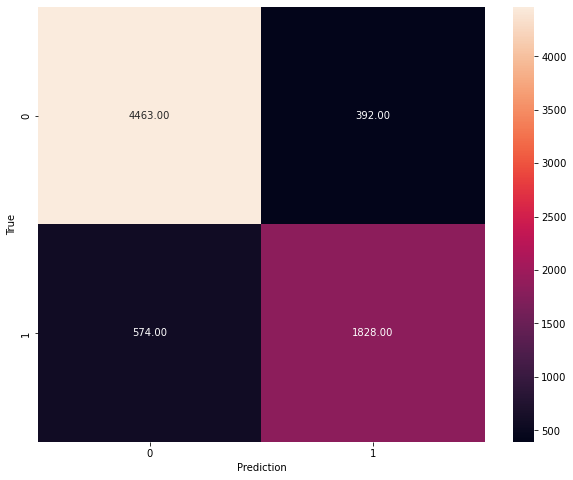

In [191]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, dt_prediction), annot= True, fmt=".2f")

plt.xlabel("Prediction")
plt.ylabel("True")

plt.show()

In [192]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4855
           1       0.82      0.76      0.79      2402

    accuracy                           0.87      7257
   macro avg       0.85      0.84      0.85      7257
weighted avg       0.87      0.87      0.87      7257



#### Tuning

In [148]:
param_grid = {
              "max_depth": [11, 12, 13],
              "min_samples_leaf": [1, 2, 3]
             }

g_cv = GridSearchCV(DT, param_grid=param_grid, scoring="neg_mean_squared_error", cv= 5, verbose= 6, n_jobs=-1)
g_cv.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=12, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [11, 12, 13],
                         'min_samples_leaf': [1, 2, 3]},
             scoring='neg_mean_squared_error', verbose=6)

In [149]:
g_cv.best_params_

{'max_depth': 12, 'min_samples_leaf': 1}

## Recycle Bin

In [77]:
# BSS = SequentialFeatureSelector(RandomForestClassifier(n_estimators=270,
#                                                        max_depth=20,
#                                                        random_state= 0,
#                                                        n_jobs= -1,
#                                                        oob_score= True
#                                                        ),
#                                 k_features=30,
#                                 forward= False,
#                                 cv=5,
#                                 scoring="accuracy",
#                                 n_jobs= -1,
#                                 verbose= 7                               
#                                )
                            

In [78]:
# BSS.fit(X_train, np.ravel(y_train))
# BSS.k_score_

In [ ]:
# BSS_features = list(BSS.k_feature_names_)
# BSS_features

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(features[BSS_features], target, test_size=.2, random_state=42)

In [120]:
# from sklearn.feature_selection import chi2

In [121]:
# f_p = chi2(X_train, y_train)
# f_p

In [122]:
# f_score = f_p[0]
# f_score

In [123]:
# pd.Series(f_score).sort_values()

In [124]:
# pd.Series(BSS.k_feature_idx_).sort_values(ascending= False)

In [125]:
# pd.Series(f_score).sort_values(ascending= False)

In [126]:
# features.columns = features.columns.astype(str)

In [127]:
# from sklearn.linear_model import LogisticRegression

In [128]:
# log_reg = LogisticRegression(penalty= 'l1', solver= 'liblinear', C=.05 )
# log_reg.fit(features, np.ravel(target))

In [129]:
# log_reg.coef_

In [ ]:
# x= pd.DataFrame(RF.feature_importances_, columns= ["imp"]).sort_values(by= "imp", ascending= False).iloc[:32,:]

In [ ]:
# BSS = SequentialFeatureSelector(RandomForestClassifier(n_estimators=150,
#                                                        max_depth=5,
#                                                        random_state= 0,
#                                                        n_jobs= -1,
#                                                        oob_score= True
#                                                        ),
#                                 k_features=20,
#                                 forward= False,
#                                 cv=5,
#                                 scoring="accuracy",
#                                 n_jobs= -1
                                
#                                )
                            

In [ ]:
# BSS.fit(X_train, np.ravel(y_train))
# BSS.k_score_

In [ ]:
# BSS_features = list(BSS.k_feature_names_)
# BSS_features

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(features[BSS_features], target, test_size=.2, random_state=42)

In [ ]:
# X_train.iloc[x.index,:]

In [ ]:
# x= X_train.iloc[:,imp_feat_indx]
# x.columns.astype("str")